<a href="https://colab.research.google.com/github/Shayantan1012/DeepLearning-Projects/blob/main/ChunModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
ds=pd.read_csv('/ChurnModelling.csv')
print(ds)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [3]:
ds.drop(columns=['CustomerId','RowNumber','Surname'],axis=1,inplace=True)


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds['Geography']=le.fit_transform(ds['Geography'])
ds['Gender']=le.fit_transform(ds['Gender'])
print(ds['Geography'])
print(ds['Gender'])

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64


In [5]:
pd.get_dummies(ds,columns=['Geography'],drop_first=True)
print(ds)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  E

In [6]:
X=ds.drop(columns=['Exited']).values
Y=ds['Exited'].values
print(X)
print(Y)


[[6.1900000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 2.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [7.0900000e+02 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [7.7200000e+02 1.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [7.9200000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]
[1 0 1 ... 1 1 0]


In [7]:
print(X.shape)
print(Y.shape)


(10000, 10)
(10000,)


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=0)


In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

print(X_train.shape)

model.add(Dense(10,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


(9000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,Y_train,batch_size=50,epochs=50,verbose=1,validation_split=0.2)


Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8648 - loss: 0.3241 - val_accuracy: 0.8522 - val_loss: 0.3541
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8654 - loss: 0.3296 - val_accuracy: 0.8556 - val_loss: 0.3541
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8763 - loss: 0.3106 - val_accuracy: 0.8567 - val_loss: 0.3525
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8617 - loss: 0.3297 - val_accuracy: 0.8561 - val_loss: 0.3521
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8668 - loss: 0.3272 - val_accuracy: 0.8561 - val_loss: 0.3530
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8672 - loss: 0.3208 - val_accuracy: 0.8550 - val_loss: 0.3519
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8679 - loss: 0.3291 - val_accuracy: 0.8567 - val_loss: 0.3527
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8676 - loss: 0.3251 - val_accuracy: 0.

In [ ]:
y_pred=model.predict(X_test)
print(y_pred)


In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred=y_pred.flatten()
y_pred_binary = (y_pred >= 0.5).astype(int)
print(accuracy_score(y_test,y_pred_binary))



0.859


{'accuracy': [0.8650000095367432, 0.8654166460037231, 0.8654166460037231, 0.8634722232818604, 0.8655555844306946, 0.8644444346427917, 0.8668055534362793, 0.8661110997200012, 0.8655555844306946, 0.8662499785423279, 0.8663889169692993, 0.863611102104187, 0.8643055558204651, 0.8647222518920898, 0.8654166460037231, 0.8666666746139526, 0.866527795791626, 0.8647222518920898, 0.866527795791626, 0.8658333420753479, 0.8679166436195374, 0.8651388883590698, 0.8662499785423279, 0.8645833134651184, 0.8654166460037231, 0.8681944608688354, 0.867638885974884, 0.8686110973358154, 0.8670833110809326, 0.8651388883590698, 0.8663889169692993, 0.8654166460037231, 0.8675000071525574, 0.867222249507904, 0.8656944632530212, 0.8655555844306946, 0.8668055534362793, 0.8663889169692993, 0.8666666746139526, 0.8673611283302307, 0.8648611307144165, 0.8680555820465088, 0.8655555844306946, 0.8652777671813965, 0.8656944632530212, 0.866944432258606, 0.8650000095367432, 0.8668055534362793, 0.8683333396911621, 0.8670833110

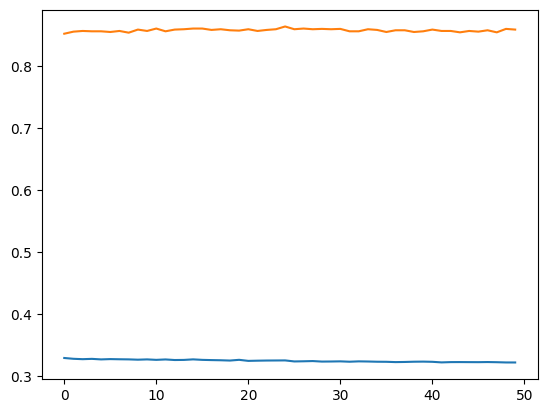

In [30]:
import matplotlib.pyplot as plt
print(model.history.history)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_accuracy'])